In [1]:
import pandas as pd

df = pd.read_csv("data/50-to-100k.csv", index_col=0)
df.tail()

,dataset,model,model_id,lambda,loss,samples,combined,polarity,semantic,history
539,sst2,gte-base,Triplet(gte-base)(lambda=7.5),7.50,TripletLoss,50,0.82,0.804,0.837,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
540,sst2,gte-base,Triplet(gte-base)(lambda=5),5.00,TripletLoss,50,0.82,0.804,0.837,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
541,sst2,gte-base,Triplet(gte-base)(lambda=1),1.00,TripletLoss,50,0.82,0.804,0.837,"[{'semantic': 0.837, 'combined': 0.82, 'polari..."
542,sst2,gte-base,Triplet(gte-base)(lambda=0.1),0.10,TripletLoss,50,0.82,0.804,0.837,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
543,sst2,gte-base,Triplet(gte-base)(lambda=0.01),0.01,TripletLoss,50,0.82,0.804,0.837,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."


In [2]:
df = df.drop(["model", "loss", "lambda"], axis=1)
df["polarity"] = df["polarity"] * 100
df["semantic"] = df["semantic"] * 100
df.tail()

,dataset,model_id,samples,combined,polarity,semantic,history
539,sst2,Triplet(gte-base)(lambda=7.5),50,0.82,80.4,83.7,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
540,sst2,Triplet(gte-base)(lambda=5),50,0.82,80.4,83.7,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
541,sst2,Triplet(gte-base)(lambda=1),50,0.82,80.4,83.7,"[{'semantic': 0.837, 'combined': 0.82, 'polari..."
542,sst2,Triplet(gte-base)(lambda=0.1),50,0.82,80.4,83.7,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."
543,sst2,Triplet(gte-base)(lambda=0.01),50,0.82,80.4,83.7,"[{'combined': 0.82, 'polarity': 0.804, 'semant..."


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append("../")
from util import sns_config, matplot_config, tex_config

sns.set_style("whitegrid", sns_config)
matplotlib.rcParams.update(matplot_config)

save_latex = False

if save_latex:
    matplotlib.use("pgf")
    matplotlib.rcParams.update(tex_config)

/tmp/ipykernel_34067/2342296638.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


<Figure size 640x480 with 0 Axes>

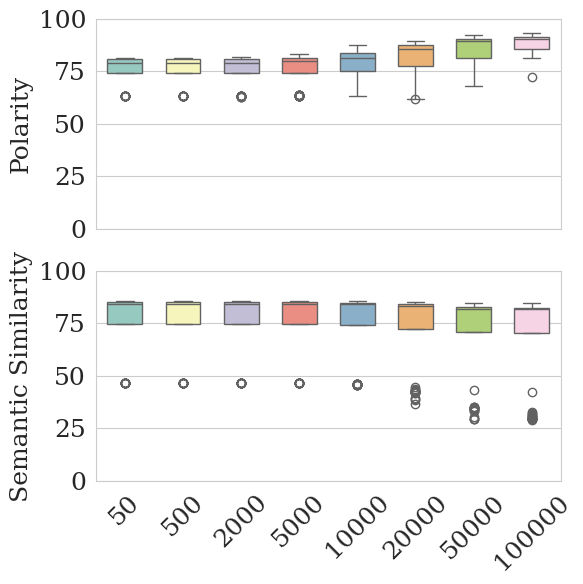

In [4]:
# reset plt:
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=False, figsize=(6,6))

WIDTH = 0.6

sns.boxplot(x="samples", y="polarity", data=df, palette="Set3", hue="samples", ax=ax1, width=WIDTH)
ax1.set_ylabel("Polarity")
# ax1.set_ylim([60, 95])
ax1.set_ylim([0, 100])
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.legend_.remove()

sns.boxplot(x="samples", y="semantic", data=df, palette="Set3", hue="samples", ax=ax2, width=WIDTH)   
ax2.set_xlabel("")
ax2.set_ylabel("Semantic Similarity")
# ax2.set_ylim([20, 90])
ax2.set_ylim([0, 100])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend_.remove()

plt.show()
if save_latex:
    os.makedirs("figures", exist_ok=True)
    fig.savefig("figures/sample_size_box.pgf", format="pgf", bbox_inches="tight")

/tmp/ipykernel_34067/2038752376.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


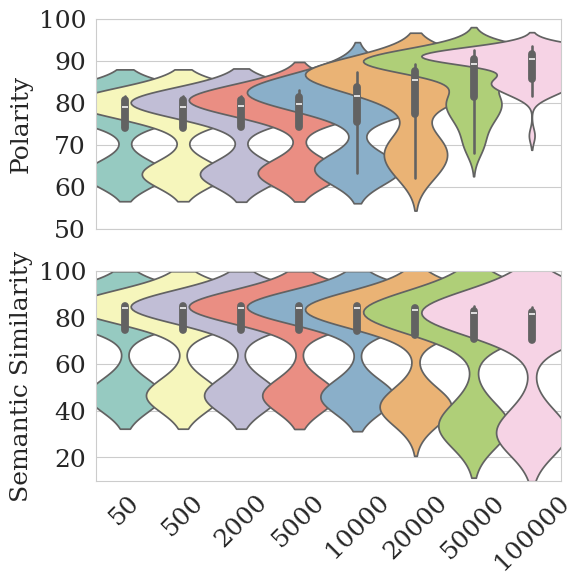

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append("../")
from util import sns_config, matplot_config, tex_config

sns.set_style("whitegrid", sns_config)
matplotlib.rcParams.update(matplot_config)

if save_latex:
    matplotlib.use("pgf")
    matplotlib.rcParams.update(tex_config)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=False, figsize=(6,6))

sns.set_theme(style="whitegrid")
sns.violinplot(x="samples", y="polarity", data=df, palette="Set3", hue="samples", ax=ax1, width=3.8)
ax1.set_ylabel("Polarity")
ax1.set_ylim([50, 100])
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.legend_.remove()

sns.violinplot(x="samples", y="semantic", data=df, palette="Set3", hue="samples", ax=ax2, width=3.8)   
ax2.set_xlabel("")
ax2.set_ylabel("Semantic Similarity")
ax2.set_ylim([10, 100])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend_.remove()

plt.show()
if save_latex:
    os.makedirs("figures", exist_ok=True)
    fig.savefig("figures/sample_size_violin.pgf", format="pgf", bbox_inches="tight")

In [6]:
by_samples = df.groupby("samples")
by_samples = pd.DataFrame(by_samples[["polarity", "semantic"]].agg(
    ["mean", "std", "min", "max"]
))
# by_samples = by_samples * 100
# by_samples = by_samples.round(1)
by_samples

def make_latex_row(row):
    return f"{row['mean']:.1f} & {row['std']:.1f} & {row['min']:.1f} & {row['max']:.1f}"

for i, sample_size in enumerate(by_samples.index.values):
    table_row = []
    for metric in ["polarity", "semantic"]:
        metric_df = by_samples[metric]
        latex_rows = metric_df.apply(make_latex_row, axis=1)
        table_row.append(latex_rows.values[i])
    table_row_str = f"{sample_size} & " + " & ".join(table_row) + "\\\\"
    print(table_row_str)

50 & 75.7 & 7.5 & 63.0 & 81.5 & 75.1 & 16.6 & 46.6 & 85.5\\
500 & 75.7 & 7.5 & 63.0 & 81.5 & 75.1 & 16.6 & 46.6 & 85.5\\
2000 & 75.7 & 7.5 & 62.9 & 81.7 & 75.1 & 16.6 & 46.6 & 85.5\\
5000 & 76.3 & 7.7 & 63.1 & 83.1 & 75.1 & 16.6 & 46.5 & 85.5\\
10000 & 78.0 & 8.3 & 63.2 & 87.3 & 74.9 & 16.8 & 45.7 & 85.4\\
20000 & 81.5 & 8.7 & 61.8 & 89.2 & 73.0 & 18.3 & 36.4 & 84.9\\
50000 & 86.2 & 6.4 & 68.0 & 92.5 & 70.2 & 21.3 & 29.6 & 84.7\\
100000 & 88.9 & 4.0 & 72.2 & 93.4 & 69.3 & 22.3 & 29.0 & 84.6\\


In [7]:
print(by_samples.to_latex(float_format="%.1f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{4}{r}{polarity} & \multicolumn{4}{r}{semantic} \\
 & mean & std & min & max & mean & std & min & max \\
samples &  &  &  &  &  &  &  &  \\
\midrule
50 & 75.7 & 7.5 & 63.0 & 81.5 & 75.1 & 16.6 & 46.6 & 85.5 \\
500 & 75.7 & 7.5 & 63.0 & 81.5 & 75.1 & 16.6 & 46.6 & 85.5 \\
2000 & 75.7 & 7.5 & 62.9 & 81.7 & 75.1 & 16.6 & 46.6 & 85.5 \\
5000 & 76.3 & 7.7 & 63.1 & 83.1 & 75.1 & 16.6 & 46.5 & 85.5 \\
10000 & 78.0 & 8.3 & 63.2 & 87.3 & 74.9 & 16.8 & 45.7 & 85.4 \\
20000 & 81.5 & 8.7 & 61.8 & 89.2 & 73.0 & 18.3 & 36.4 & 84.9 \\
50000 & 86.2 & 6.4 & 68.0 & 92.5 & 70.2 & 21.3 & 29.6 & 84.7 \\
100000 & 88.9 & 4.0 & 72.2 & 93.4 & 69.3 & 22.3 & 29.0 & 84.6 \\
\bottomrule
\end{tabular}



In [8]:
max_df = by_samples.xs("max", level=1, axis=1)
max_df

,polarity,semantic
samples,,
50,81.5,85.5
500,81.5,85.5
2000,81.7,85.5
5000,83.1,85.5
10000,87.3,85.4
20000,89.2,84.9
50000,92.5,84.7
100000,93.4,84.6


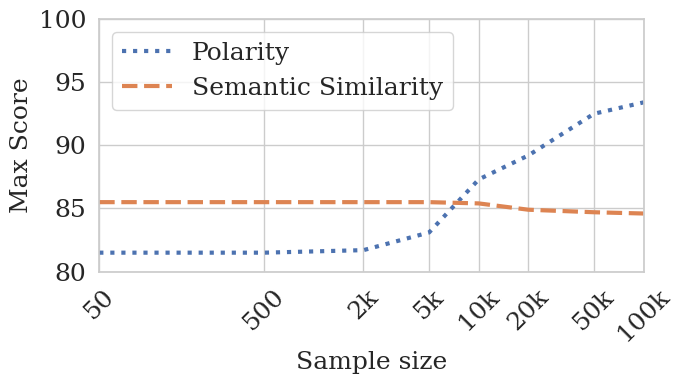

In [9]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append("../")
from util import sns_config, matplot_config, tex_config

sns.set_style("whitegrid", sns_config)
matplotlib.rcParams.update(matplot_config)

save_latex = False

if save_latex:
    matplotlib.use("pgf")
    matplotlib.rcParams.update(tex_config)

fig, ax = plt.subplots(figsize=(7, 4))
# line styles for each metric
line_styles = [
    (5, 1),  # solid line
    (3, 1),  # dashed line
    (1, 1),  # dotted line
]

ax.set_xscale("log")
ticks = [str(x) for x in max_df.index]
num_to_k = lambda x: x[:-3] + "k" if x.endswith("000") else x
ticks = [num_to_k(x) for x in ticks]
ax.set_xlim([50, 100000])
ax.set_xticks(max_df.index)
ax.set_xticklabels(ticks)

# rotate 45
ax.tick_params(axis='x', rotation=45)

agg = "max"  # min/max
sns.lineplot(data=max_df, x="samples", y=f"polarity", ax=ax, linestyle="dotted", label="Polarity")
sns.lineplot(data=max_df, x="samples", y=f"semantic", ax=ax, errorbar="sd", linestyle="dashed", label="Semantic Similarity")
ax.set_xlabel("Sample size")
ax.set_ylabel("Max Score")

ax.set_ylim([80, 100])
plt.tight_layout()
plt.show()
if save_latex:
    os.makedirs("figures", exist_ok=True)
    fig.savefig("figures/sample_size.pgf", format="pgf")